In [789]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [790]:
df=pd.read_csv('laptop_data.csv')
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [791]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [792]:
df.drop('Unnamed: 0',axis='columns',inplace=True)

In [793]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [794]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [795]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [796]:
df.duplicated().sum()

29

In [797]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1298     True
1299     True
1300     True
1301     True
1302     True
Length: 1303, dtype: bool

In [798]:
catvars=df.select_dtypes(include=['object']).columns
numvars=df.select_dtypes(include=['int32','int64','float32','float64']).columns

catvars,numvars

(Index(['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram', 'Memory',
        'Gpu', 'OpSys', 'Weight'],
       dtype='object'),
 Index(['Inches', 'Price'], dtype='object'))

In [799]:
def uniquevals(col):
    print(f'Details of particular col {col} is :{df[col].unique()}')

def valuecounts(col):
    print(f'Valuecounts of the particular col {col} is : {df[col].value_counts()}')

for col in df.columns:
    uniquevals(col)
    print("_" *75)

Details of particular col Company is :['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
___________________________________________________________________________
Details of particular col TypeName is :['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']
___________________________________________________________________________
Details of particular col Inches is :[13.3 15.6 15.4 14.  12.  11.6 17.3 10.1 13.5 12.5 13.  18.4 13.9 12.3
 17.  15.  14.1 11.3]
___________________________________________________________________________
Details of particular col ScreenResolution is :['IPS Panel Retina Display 2560x1600' '1440x900' 'Full HD 1920x1080'
 'IPS Panel Retina Display 2880x1800' '1366x768'
 'IPS Panel Full HD 1920x1080' 'IPS Panel Retina Display 2304x1440'
 'IPS Panel Full HD / Touchscreen 1920x1080'
 'Full HD / Touchscreen 1920x1080' 'Touchscree

In [800]:
#Converting categorical value of ram with the numeric values
df['Ram'] = df['Ram'].str.replace("GB", "")
df['Weight'] = df['Weight'].str.replace("kg", "")
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')


In [801]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [802]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


**Exploratory Data Analysis**

#We are considering price as our dependent variable

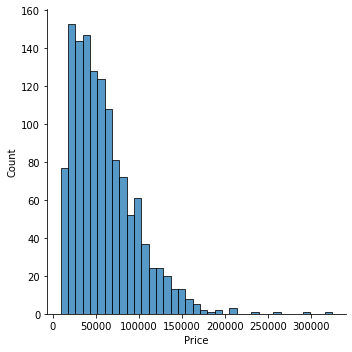

In [803]:
sns.displot(df['Price'])
plt.savefig('Price.jpg')

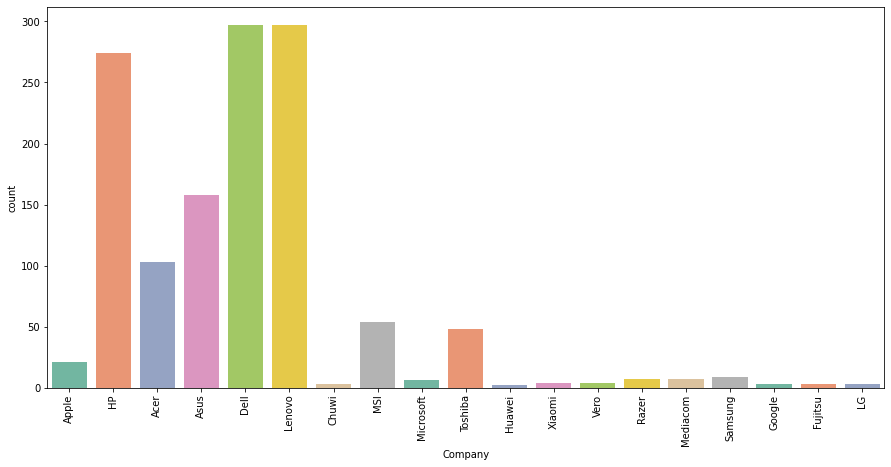

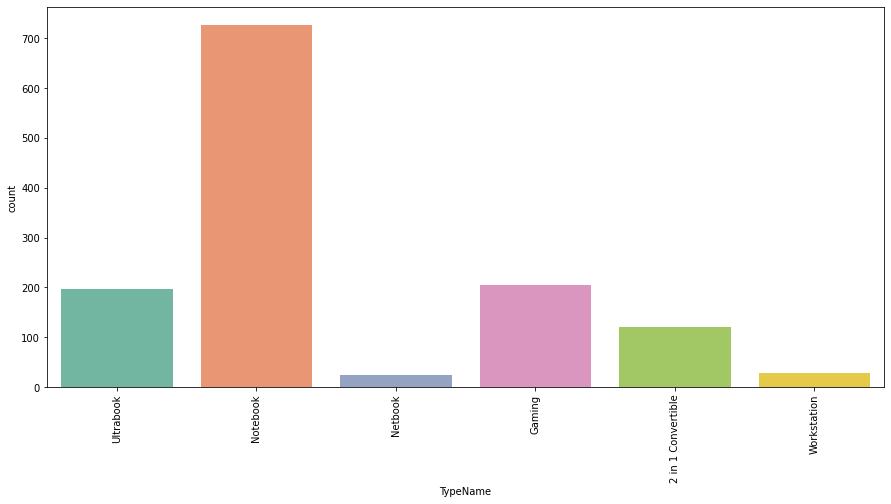

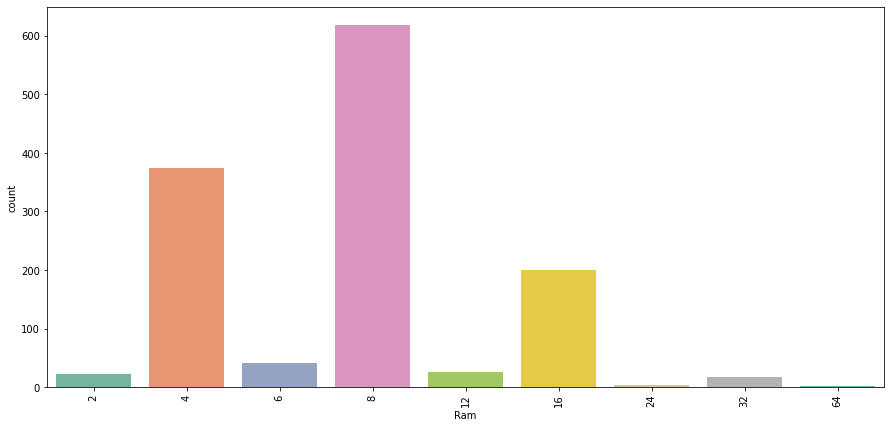

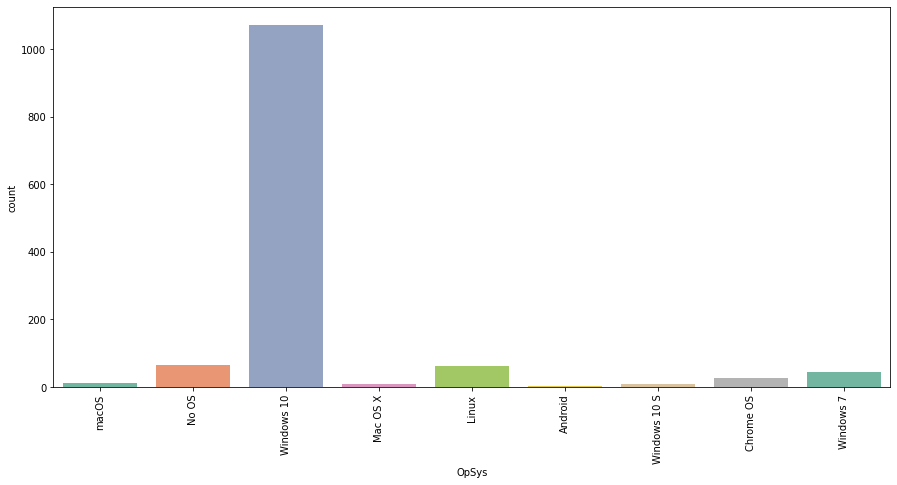

In [804]:
#countplots for categorial variable
def drawplot(col):
    plt.figure(figsize=(15, 7))
    sns.countplot(data=df, x=col, palette='Set2')
    plt.xticks(rotation='vertical')

toview = ['Company','TypeName','Ram','OpSys']
for col in toview:
    drawplot(col)
    plt.savefig('{col}.jpg')


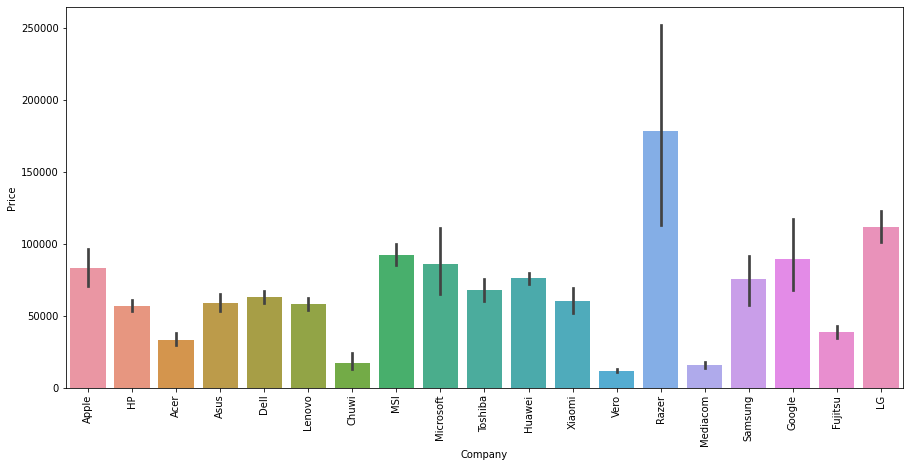

<Figure size 432x288 with 0 Axes>

In [805]:
plt.figure(figsize=(15,7))
sns.barplot(data=df,x='Company', y='Price')
plt.xticks(rotation='vertical')
plt.show()
plt.savefig('CompanyvsPrice')

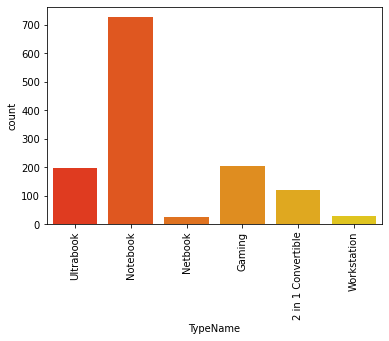

In [806]:
#for types of laptops

sns.countplot(data=df, x='TypeName',palette='autumn')
plt.xticks(rotation='vertical')
plt.savefig('Typename_count')

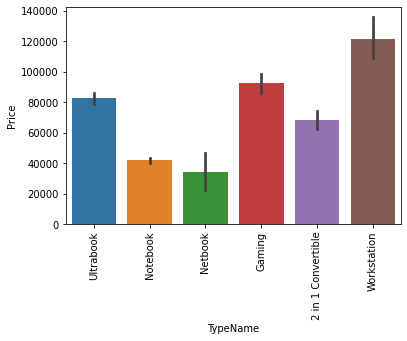

In [807]:
#Variation of typename with price
sns.barplot(data=df, x='TypeName',y='Price')
plt.xticks(rotation='vertical')
plt.savefig('TypenamevsPrice')


<AxesSubplot:xlabel='Inches', ylabel='Price'>

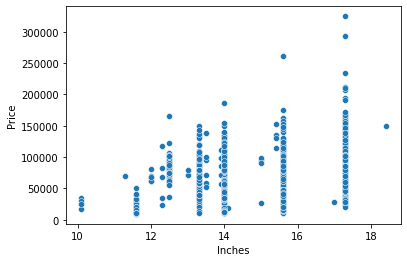

In [808]:
#Variation of size with price
sns.scatterplot(data=df, x='Inches', y='Price')

In [809]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [810]:
#creating a new column for touch screen
df['TouchScreen']=df['ScreenResolution'].apply(lambda element:1 if 'Touchscreen' in element else 0)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


In [811]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
875,Dell,Ultrabook,12.5,Full HD 1920x1080,Intel Core i7 7600U 2.8GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.60,90043.20,0
794,Apple,Ultrabook,12.0,IPS Panel Retina Display 2304x1440,Intel Core M 1.2GHz,8,512GB Flash Storage,Intel HD Graphics 5300,Mac OS X,0.92,62071.20,0
667,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,1TB HDD,AMD Radeon 530,Windows 10,2.10,39693.60,0
1180,Lenovo,2 in 1 Convertible,14.0,IPS Panel Touchscreen 2560x1440,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.36,87219.36,1
623,Fujitsu,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,2.20,42570.72,0


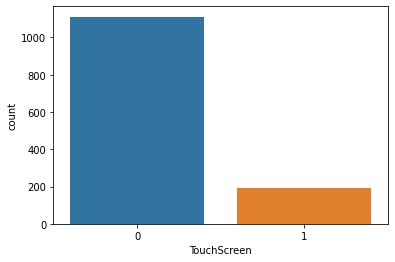

In [812]:
sns.countplot(data=df,x='TouchScreen')
plt.savefig('touchscreen.jpg')
#according to graph arounf 200 are touch screen.


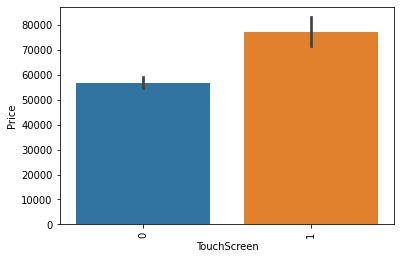

In [813]:
sns.barplot(data=df, x='TouchScreen',y='Price')
plt.xticks(rotation='vertical')
plt.savefig('TouchSvsPrice')

In [814]:
#Creating a new column for IPS
df['IPS'] = df['ScreenResolution'].apply(
    lambda element:1 if "IPS" in element else 0
)
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS
536,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,AMD Radeon 530,Windows 10,2.20,42486.0048,0,0
133,Acer,Notebook,15.6,Full HD 1920x1080,Intel Core i3 7130U 2.7GHz,4,256GB SSD,Nvidia GeForce MX130,Windows 10,2.20,30476.1600,0,0
193,Lenovo,Notebook,17.3,1600x900,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Nvidia GeForce MX150,No OS,2.80,37189.4400,0,0
1043,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,2.30,55922.6880,0,0
560,Acer,2 in 1 Convertible,11.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Celeron Dual Core N3350 2.0GHz,4,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.25,18594.7200,1,1


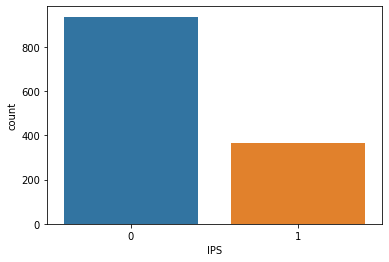

In [815]:
sns.countplot(data=df,x='IPS')
plt.savefig('touchscreen.jpg')

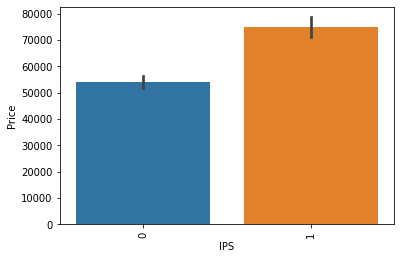

In [816]:
sns.barplot(data=df, x='IPS',y='Price')
plt.xticks(rotation='vertical')
plt.savefig('TouchSvsPrice')

**Extract X resolution and Y resolution **

In [817]:
splitdf=df['ScreenResolution'].str.split('x',n=1,expand =True)
splitdf.head()

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600


In [818]:
df['X_res']= splitdf[0]
df['Y_res']=splitdf[1]
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [819]:
df['X_res']=df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [820]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  TouchScreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


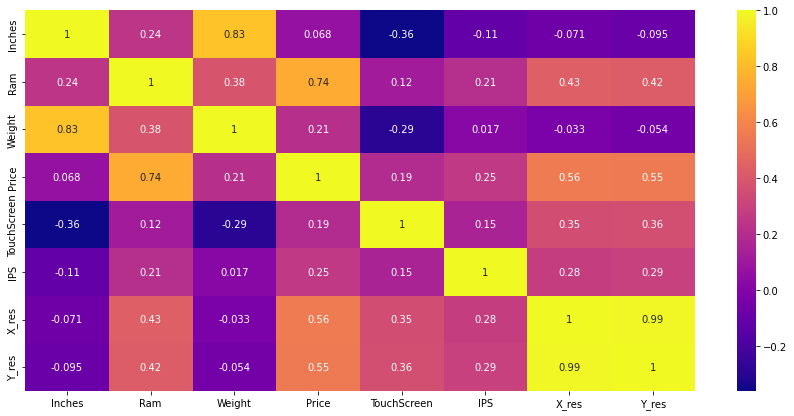

In [821]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,cmap='plasma')
plt.savefig('Correlation')

In [822]:
df.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
TouchScreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

In [823]:
df['PPI']=(((df["X_res"]**2 + df['Y_res']**2))**0.5/df['Inches']).astype(float)

In [824]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [825]:
df.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
TouchScreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
PPI            0.473487
Name: Price, dtype: float64

In [826]:
df.drop(columns=['ScreenResolution','Inches','X_res','Y_res'],inplace=True)
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [827]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [828]:
df['CPU_Name']=df['Cpu'].apply(lambda text:" ".join(text.split()[:3]))
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [829]:
#check if it a processor of intel  or  amd classify it

def processortype(text):
    if text=='Intel Core i7' or text=='Interl Core i5' or text=='Intel Core i3':
        return text
    else:
        if text.split()[0]=='Intel':
            return 'Other intel processor'
        else:
            return 'AMD Processor'
        
df['CPU_Name']=df['CPU_Name'].apply(lambda text:processortype(text))
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Other intel processor
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Other intel processor
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Other intel processor
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Other intel processor


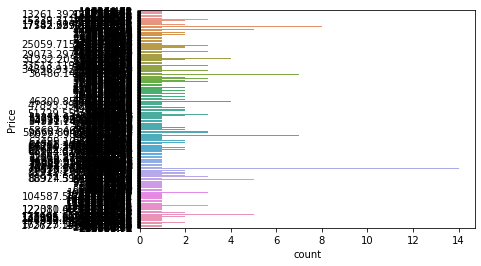

In [830]:
sns.countplot(data=df,y='Price')
plt.savefig('price2.jpg')

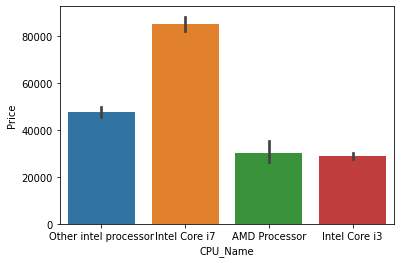

In [831]:
sns.barplot(data=df,x='CPU_Name',y='Price')
plt.savefig('CPUnamevsPrice.jpg')

In [832]:
df.drop(columns=['Cpu'],inplace=True)
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_Name
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Other intel processor
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Other intel processor
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Other intel processor
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Other intel processor


**Analysis of RAM Column**

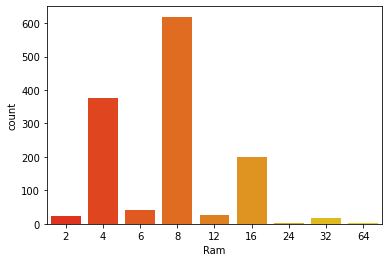

In [833]:
sns.countplot(data=df,x='Ram',palette='autumn')
plt.savefig('Ram.jpg')

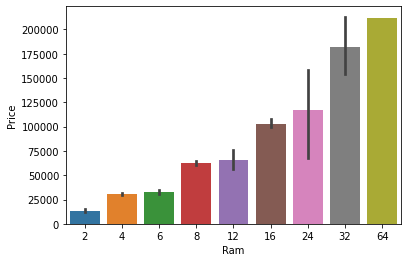

In [834]:
sns.barplot(data=df,x='Ram',y='Price')
plt.savefig('Ramvsprice')

In [835]:
df['Memory'].iloc[:1][0]

'128GB SSD'

In [836]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [837]:
#remove decimal from 1.0 TB ---> 1TB
df['Memory']=df['Memory'].astype(str).replace('\.0','',regex=True)

#replace GB with space

df['Memory']=df['Memory'].str.replace('GB','')
#replace TB with 000

df['Memory']=df['Memory'].str.replace('TB','000')

#splitting accoss '+' character
newdf=df['Memory'].str.split("+",n=1,expand=True)
newdf

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1298,128 SSD,None
1299,512 SSD,None
1300,64 Flash Storage,None
1301,1000 HDD,None


In [838]:
df['first']=newdf[0]
df['first']=df['first'].str.strip()
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_Name,first
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Other intel processor,128 SSD
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Other intel processor,128 Flash Storage
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Other intel processor,256 SSD
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Other intel processor,256 SSD


In [839]:
def applychanges(value):
    df['Layer1'+value]=df['first'].apply(lambda x:1 if value in x else 0)

listtoapply=['HDD','SSD','Hybrid','FlashStorage']
for value in listtoapply:
    applychanges(value)

df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_Name,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1FlashStorage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Other intel processor,128 SSD,0,1,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Other intel processor,128 Flash Storage,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Other intel processor,256 SSD,0,1,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD,0,1,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Other intel processor,256 SSD,0,1,0,0


In [840]:
#removing characters

df['first']=df['first'].str.replace(r'\D','')
df['first'].value_counts()

C:\Users\abhij\AppData\Local\Temp\ipykernel_2060\2566509811.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first']=df['first'].str.replace(r'\D','')


256     508
1000    250
128     177
512     140
500     132
32       45
64       17
2000     16
16       10
180       5
240       1
8         1
508       1
Name: first, dtype: int64

In [841]:
df['Second']=newdf[1]
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_Name,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1FlashStorage,Second
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Other intel processor,128,0,1,0,0,None
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Other intel processor,128,0,0,0,0,None
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Other intel processor,256,0,1,0,0,None
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512,0,1,0,0,None
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Other intel processor,256,0,1,0,0,None


In [842]:
def applychanges1(value):
    df['Layer2'+value]=df['Second'].apply(lambda x:1 if value in x else 0)

listtoapply1=['HDD','SSD','Hybrid','FlashStorage']
df['Second'] = df['Second'].fillna("0")
for value in listtoapply1:
    applychanges1(value)
#remove all the characters and reseet only the alphabvet
df['Second']=df['Second'].str.replace(r'\D','')
df['Second'].value_counts()

C:\Users\abhij\AppData\Local\Temp\ipykernel_2060\2302730230.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Second']=df['Second'].str.replace(r'\D','')


0       1095
1000     187
2000      15
256        3
500        2
512        1
Name: Second, dtype: int64

In [843]:
df['first']=df['first'].astype('int')
df['Second']=df['Second'].astype('int')
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,...,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1FlashStorage,Second,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2FlashStorage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,...,128,0,1,0,0,0,0,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,...,128,0,0,0,0,0,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,...,256,0,1,0,0,0,0,0,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,...,512,0,1,0,0,0,0,0,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,...,256,0,1,0,0,0,0,0,0,0


In [844]:
#multiplying the elements and storing the result in subsequent columns
df['HDD']=(df['first']*df['Layer1HDD']+df['Second']*df["Layer2HDD"])
df['SDD']=(df['first']*df['Layer1SSD']+df['Second']*df["Layer2SSD"])
df['Hybrid']=(df['first']*df['Layer1Hybrid']+df['Second']*df["Layer2Hybrid"])
df['Flash_Storage']=(df['first']*df['Layer1FlashStorage']+df['Second']*df["Layer2FlashStorage"])

#dropping unnessary colums
df.drop(columns=['first','Second','Layer1HDD','Layer1SSD','Layer1Hybrid'
        ,'Layer1FlashStorage','Layer2HDD','Layer2SSD','Layer2Hybrid'
        ,'Layer2FlashStorage'], inplace=True)

In [845]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_Name,HDD,SDD,Hybrid,Flash_Storage
557,Lenovo,Notebook,6,128 SSD + 1000 HDD,Nvidia GeForce 940MX,Windows 10,2.80,50562.72,0,0,106.113062,Intel Core i7,1000,128,0,0
401,Asus,Gaming,16,256 SSD + 1000 HDD,Nvidia GeForce GTX 1050,Windows 10,2.90,81465.12,0,0,127.335675,Intel Core i7,1000,256,0,0
1107,Lenovo,2 in 1 Convertible,4,256 SSD,Intel HD Graphics 520,Windows 10,2.10,46193.76,1,1,141.211998,Other intel processor,0,256,0,0
574,Lenovo,Notebook,4,500 HDD,Intel HD Graphics 620,Windows 10,2.05,36496.80,0,0,141.211998,Other intel processor,500,0,0,0
1206,HP,Notebook,8,256 SSD,Intel HD Graphics 620,Windows 10,1.91,30849.12,0,0,100.454670,Other intel processor,0,256,0,0


In [846]:
df.drop(columns=['Memory'],inplace=True)
df.sample(5)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_Name,HDD,SDD,Hybrid,Flash_Storage
680,MSI,Gaming,8,Nvidia GeForce GTX 1050,Windows 10,2.20,53168.1120,0,0,141.211998,Other intel processor,0,256,0,0
517,Asus,Gaming,24,Nvidia GeForce GTX1080,Windows 10,2.24,158135.0400,0,0,141.211998,Intel Core i7,0,512,0,0
1220,Lenovo,Notebook,8,Intel HD Graphics 520,Windows 10,2.30,81465.1200,0,1,141.211998,Intel Core i7,0,256,0,0
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Other intel processor,0,128,0,0
513,Dell,Notebook,16,AMD Radeon 530,Windows 10,2.20,64961.1072,0,0,141.211998,Intel Core i7,2000,256,0,0


In [847]:
df.corr()['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
TouchScreen      0.191226
IPS              0.252208
PPI              0.473487
HDD             -0.096441
SDD              0.670799
Hybrid           0.007989
Flash_Storage         NaN
Name: Price, dtype: float64

In [848]:
df.columns

Index(['Company', 'TypeName', 'Ram', 'Gpu', 'OpSys', 'Weight', 'Price',
       'TouchScreen', 'IPS', 'PPI', 'CPU_Name', 'HDD', 'SDD', 'Hybrid',
       'Flash_Storage'],
      dtype='object')

In [849]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_Name,HDD,SDD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Other intel processor,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Other intel processor,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Other intel processor,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Other intel processor,0,256


In [850]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

<AxesSubplot:xlabel='Gpu brand', ylabel='count'>

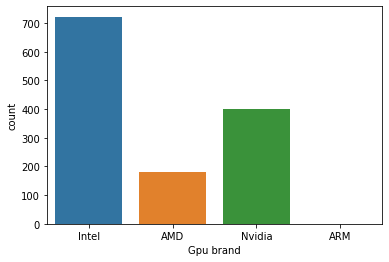

In [851]:
#Extracting the brands from the Gpu
df['Gpu brand']=df['Gpu'].apply(lambda x:x.split()[0])
sns.countplot(data=df,x='Gpu brand')

<AxesSubplot:xlabel='Gpu brand', ylabel='count'>

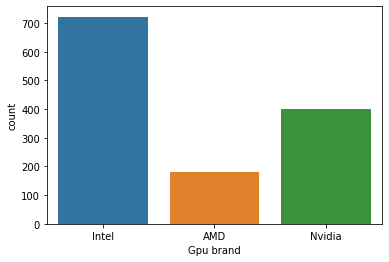

In [852]:
df=df[df['Gpu brand']!='ARM']
sns.countplot(data=df,x='Gpu brand')

<AxesSubplot:xlabel='Gpu brand', ylabel='Price'>

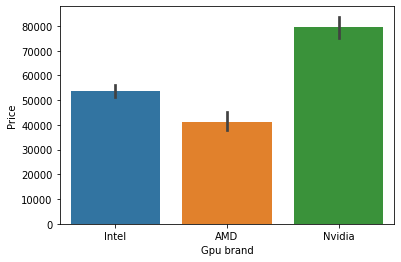

In [853]:
sns.barplot(data=df,x='Gpu brand',y='Price',estimator=np.mean)

In [854]:
df= df.drop(columns=['Gpu'])
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_Name,HDD,SDD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Other intel processor,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Other intel processor,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Other intel processor,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Other intel processor,0,256,Intel


In [855]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'macOS'),
  Text(1, 0, 'No OS'),
  Text(2, 0, 'Windows 10'),
  Text(3, 0, 'Mac OS X'),
  Text(4, 0, 'Linux'),
  Text(5, 0, 'Android'),
  Text(6, 0, 'Windows 10 S'),
  Text(7, 0, 'Chrome OS'),
  Text(8, 0, 'Windows 7')])

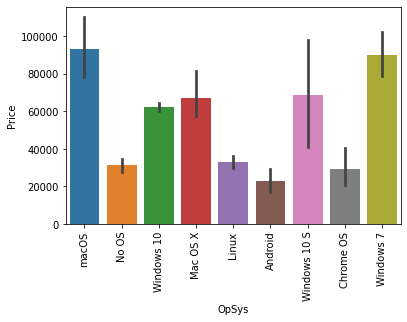

In [856]:
sns.barplot(data=df,x='OpSys',y='Price')
plt.xticks(rotation='vertical')

In [857]:
df['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [858]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Other'
df['OpSys'] = df['OpSys'].apply(lambda x:cat_os(x))
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_Name,HDD,SDD,Gpu brand
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,0,1,226.983005,Other intel processor,0,128,Intel
1,Apple,Ultrabook,8,Mac,1.34,47895.5232,0,0,127.677940,Other intel processor,0,0,Intel
2,HP,Notebook,8,Other,1.86,30636.0000,0,0,141.211998,Other intel processor,0,256,Intel
3,Apple,Ultrabook,16,Mac,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac,1.37,96095.8080,0,1,226.983005,Other intel processor,0,256,Intel


In [859]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_Name,HDD,SDD,Gpu brand
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,0,1,226.983005,Other intel processor,0,128,Intel
1,Apple,Ultrabook,8,Mac,1.34,47895.5232,0,0,127.677940,Other intel processor,0,0,Intel
2,HP,Notebook,8,Other,1.86,30636.0000,0,0,141.211998,Other intel processor,0,256,Intel
3,Apple,Ultrabook,16,Mac,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac,1.37,96095.8080,0,1,226.983005,Other intel processor,0,256,Intel


<AxesSubplot:xlabel='OpSys', ylabel='count'>

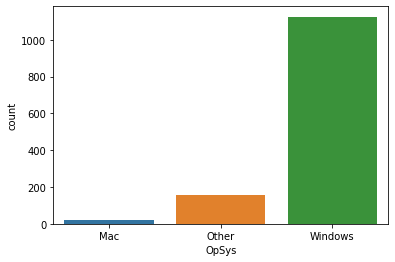

In [860]:
sns.countplot(data=df,x='OpSys')

(array([0, 1, 2]),
 [Text(0, 0, 'Mac'), Text(1, 0, 'Other'), Text(2, 0, 'Windows')])

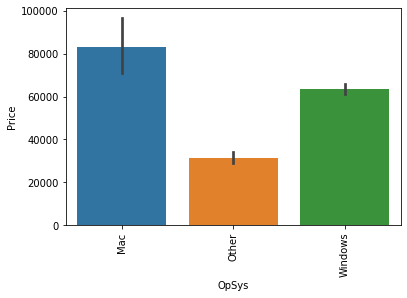

In [861]:
sns.barplot(data=df,x='OpSys',y='Price')
plt.xticks(rotation='vertical')

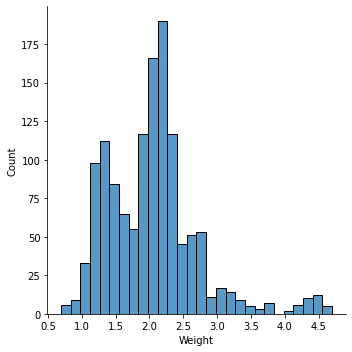

In [862]:
sns.displot(data=df,x='Weight')

<AxesSubplot:xlabel='Weight', ylabel='Price'>

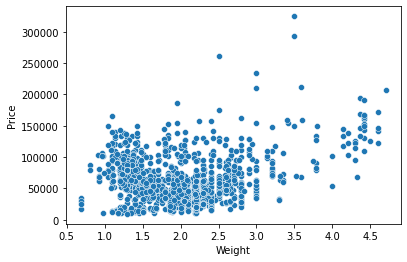

In [863]:
sns.scatterplot(data=df,x='Weight',y='Price')

In [864]:
df.corr()['Price']

Ram            0.742905
Weight         0.209867
Price          1.000000
TouchScreen    0.192917
IPS            0.253320
PPI            0.475368
HDD           -0.096891
SDD            0.670660
Name: Price, dtype: float64

In [865]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_Name,HDD,SDD,Gpu brand
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,0,1,226.983005,Other intel processor,0,128,Intel
1,Apple,Ultrabook,8,Mac,1.34,47895.5232,0,0,127.677940,Other intel processor,0,0,Intel
2,HP,Notebook,8,Other,1.86,30636.0000,0,0,141.211998,Other intel processor,0,256,Intel
3,Apple,Ultrabook,16,Mac,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac,1.37,96095.8080,0,1,226.983005,Other intel processor,0,256,Intel


In [866]:
test=np.log(df['Price'])
train=df.drop(['Price'],axis=1)

In [867]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler,StandardScaler,LabelEncoder
from sklearn import metrics
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn import tree,metrics
from sklearn.model_selection import RandomizedSearchCV

In [868]:
X_train,X_test,y_train,y_test = train_test_split(train,test,test_size=0.15,random_state=2)
X_train.shape,X_test.shape

((1106, 12), (196, 12))

In [869]:
mapper={i:value for i,value in enumerate(X_train.columns)}
mapper

{0: 'Company',
 1: 'TypeName',
 2: 'Ram',
 3: 'OpSys',
 4: 'Weight',
 5: 'TouchScreen',
 6: 'IPS',
 7: 'PPI',
 8: 'CPU_Name',
 9: 'HDD',
 10: 'SDD',
 11: 'Gpu brand'}

Linear Regression

In [870]:
step1 = ColumnTransformer(transformers=[

('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])

],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,

random_state=3,

max_samples=0.5,

max_features=0.75,

max_depth=15)

pipe = Pipeline([

('step1',step1),

('step2',step2)

])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))

print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8765776537326068
MAE 0.16374956362363863


In [871]:
np.exp(0.21)

1.2336780599567432

Ridge Regression

In [872]:
step1 = ColumnTransformer(transformers=[

('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])

],remainder='passthrough')

step2 =Ridge(alpha=10)

pipe = Pipeline([

('step1',step1),

('step2',step2)

])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))

print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7669994567366707
MAE 0.23033871658072347


Lasso regression

In [873]:
step1 = ColumnTransformer(transformers=[

('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])

],remainder='passthrough')

step2 =Lasso(alpha=0.001)

pipe = Pipeline([

('step1',step1),

('step2',step2)

])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))

print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7710275250510825
MAE 0.22824260452166423


**Decision tree**

In [874]:
step1 = ColumnTransformer(transformers=[

('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])

],remainder='passthrough')

step2 =DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([

('step1',step1),

('step2',step2)

])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))

print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.793761010576204
MAE 0.21014769990840618


**Random Forest**

In [875]:
step1 = ColumnTransformer(transformers=[

('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])

],remainder='passthrough')

step2 =RandomForestRegressor(n_estimators=100,random_state=3,
                             max_samples=0.5,max_features=0.75,max_depth=15)

pipe = Pipeline([

('step1',step1),

('step2',step2)

])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))

print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8765776537326068
MAE 0.16374956362363863


In [876]:
import pickle
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [877]:
train.head()

,Company,TypeName,Ram,OpSys,Weight,TouchScreen,IPS,PPI,CPU_Name,HDD,SDD,Gpu brand
0,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Other intel processor,0,128,Intel
1,Apple,Ultrabook,8,Mac,1.34,0,0,127.677940,Other intel processor,0,0,Intel
2,HP,Notebook,8,Other,1.86,0,0,141.211998,Other intel processor,0,256,Intel
3,Apple,Ultrabook,16,Mac,1.83,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Other intel processor,0,256,Intel


In [878]:
train.to_csv('traindata.csv',index=None)

**Hyperparameter tuning for Random Forest**

In [879]:
indexlist=[0,1,3,8,11]
transformlist=[]
for key,value in mapper.items():
    if key in indexlist:
        transformlist.append(value)

transformlist

['Company', 'TypeName', 'OpSys', 'CPU_Name', 'Gpu brand']

In [880]:
train = pd.get_dummies(train,columns=transformlist,drop_first=True)
train.head()
train.tail()

,Ram,Weight,TouchScreen,IPS,PPI,HDD,SDD,Company_Apple,Company_Asus,Company_Chuwi,...,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,OpSys_Other,OpSys_Windows,CPU_Name_Intel Core i3,CPU_Name_Intel Core i7,CPU_Name_Other intel processor,Gpu brand_Intel,Gpu brand_Nvidia
1298,4,1.80,1,1,157.350512,0,128,0,0,0,...,0,0,0,0,1,0,1,0,1,0
1299,16,1.30,1,1,276.053530,0,512,0,0,0,...,0,0,0,0,1,0,1,0,1,0
1300,2,1.50,0,0,111.935204,0,0,0,0,0,...,1,0,0,0,1,0,0,1,1,0
1301,6,2.19,0,0,100.454670,1000,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
1302,4,2.20,0,0,100.454670,500,0,0,1,0,...,1,0,0,0,1,0,0,1,1,0


In [881]:
X_train,X_test,y_train,y_test=train_test_split(train,test,test_size=0.15,random_state=2)
X_train.shape,X_test.shape

((1106, 37), (196, 37))

[Text(0.4626131470754167, 0.9782608695652174, 'Ram <= 7.0\nsquared_error = 0.39\nsamples = 1106\nvalue = 10.821'),
 Text(0.1662318098355252, 0.9347826086956522, 'SDD <= 80.0\nsquared_error = 0.192\nsamples = 362\nvalue = 10.209'),
 Text(0.07754934349538524, 0.8913043478260869, 'HDD <= 266.0\nsquared_error = 0.17\nsamples = 253\nvalue = 10.092'),
 Text(0.03154264850062544, 0.8478260869565217, 'Ram <= 3.0\nsquared_error = 0.151\nsamples = 66\nvalue = 9.772'),
 Text(0.022887859630143007, 0.8043478260869565, 'Weight <= 1.16\nsquared_error = 0.021\nsamples = 15\nvalue = 9.406'),
 Text(0.020183238108117247, 0.7608695652173914, 'TypeName_Netbook <= 0.5\nsquared_error = 0.008\nsamples = 3\nvalue = 9.588'),
 Text(0.01910138949930694, 0.717391304347826, 'Company_Lenovo <= 0.5\nsquared_error = 0.003\nsamples = 2\nvalue = 9.643'),
 Text(0.018019540890496635, 0.6739130434782609, 'squared_error = 0.0\nsamples = 1\nvalue = 9.592'),
 Text(0.020183238108117247, 0.6739130434782609, 'squared_error = -0.0

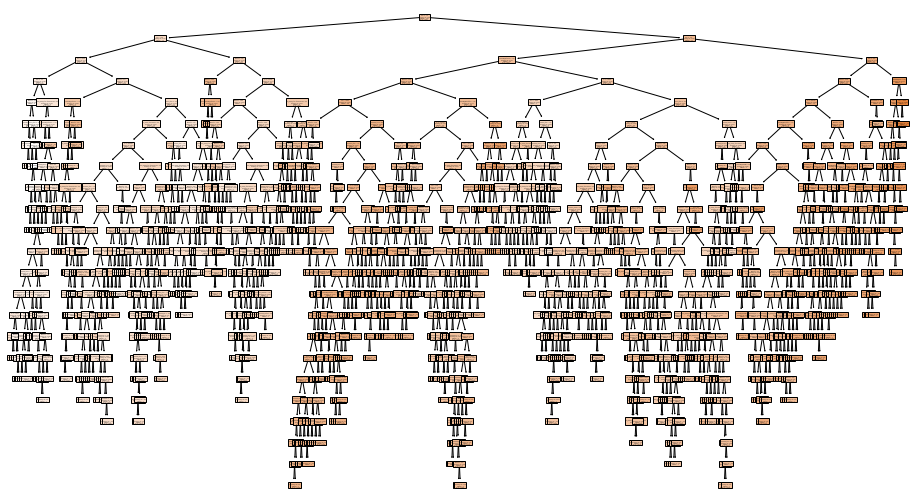

In [882]:
reg=DecisionTreeRegressor(random_state=0)
reg.fit(X_train,y_train)
plt.figure(figsize=(16,9))
tree.plot_tree(reg,filled=True,feature_names=train.columns)

In [883]:
path=reg.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas=path.ccp_alphas

In [884]:
ccp_alphas

array([0.00000000e+00, 2.05581985e-16, 1.05412163e-13, 2.01380403e-12,
       1.25921407e-11, 1.81593009e-11, 1.08577946e-10, 1.90413105e-10,
       4.91049198e-10, 5.34151131e-10, 7.10845764e-10, 1.67264384e-09,
       1.75885877e-09, 2.62165055e-09, 2.62493833e-09, 3.72228739e-09,
       3.78742920e-09, 4.84153468e-09, 5.07372622e-09, 5.49805272e-09,
       6.68479321e-09, 6.72374007e-09, 6.97094002e-09, 8.25628135e-09,
       9.24814101e-09, 1.27531889e-08, 1.34847428e-08, 1.48892111e-08,
       1.65552060e-08, 1.68770723e-08, 2.02572996e-08, 2.02949504e-08,
       2.41668325e-08, 2.72876254e-08, 3.02610142e-08, 3.03537207e-08,
       3.26282719e-08, 3.36607143e-08, 3.58476840e-08, 3.60721855e-08,
       3.71370450e-08, 3.90442720e-08, 4.00282623e-08, 4.60335999e-08,
       4.74879669e-08, 5.11643383e-08, 5.23330908e-08, 5.37271011e-08,
       5.42630695e-08, 5.56520159e-08, 5.65651440e-08, 5.78521642e-08,
       5.90484123e-08, 6.35469168e-08, 7.15306338e-08, 7.21342811e-08,
      

In [885]:
alphalist=[]
for alpha in ccp_alphas:
    reg=DecisionTreeRegressor(random_state=0,ccp_alpha=alpha)
    reg.fit(X_train,y_train)
    alphalist.append(reg)

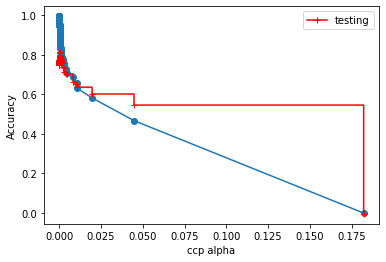

In [886]:
train_score=[reg.score(X_train,y_train)for reg in alphalist]
test_score=[reg.score(X_test,y_test)for reg in alphalist]

plt.xlabel('ccp alpha')
plt.ylabel('Accuracy')

plt.plot(ccp_alphas,train_score,marker='o')
plt.plot(ccp_alphas,test_score,marker ='+',
         label='testing',color='red',drawstyle='steps-post')
plt.legend()
plt.show()

[Text(0.5, 0.9, 'Ram <= 7.0\nsquared_error = 0.39\nsamples = 1106\nvalue = 10.821'),
 Text(0.25, 0.7, 'SDD <= 80.0\nsquared_error = 0.192\nsamples = 362\nvalue = 10.209'),
 Text(0.125, 0.5, 'squared_error = 0.17\nsamples = 253\nvalue = 10.092'),
 Text(0.375, 0.5, 'squared_error = 0.136\nsamples = 109\nvalue = 10.481'),
 Text(0.75, 0.7, 'Ram <= 14.0\nsquared_error = 0.215\nsamples = 744\nvalue = 11.119'),
 Text(0.625, 0.5, 'TypeName_Notebook <= 0.5\nsquared_error = 0.159\nsamples = 553\nvalue = 10.967'),
 Text(0.5, 0.3, 'squared_error = 0.107\nsamples = 268\nvalue = 11.172'),
 Text(0.75, 0.3, 'PPI <= 114.881\nsquared_error = 0.131\nsamples = 285\nvalue = 10.775'),
 Text(0.625, 0.1, 'squared_error = 0.072\nsamples = 59\nvalue = 10.384'),
 Text(0.875, 0.1, 'squared_error = 0.096\nsamples = 226\nvalue = 10.877'),
 Text(0.875, 0.5, 'squared_error = 0.12\nsamples = 191\nvalue = 11.558')]

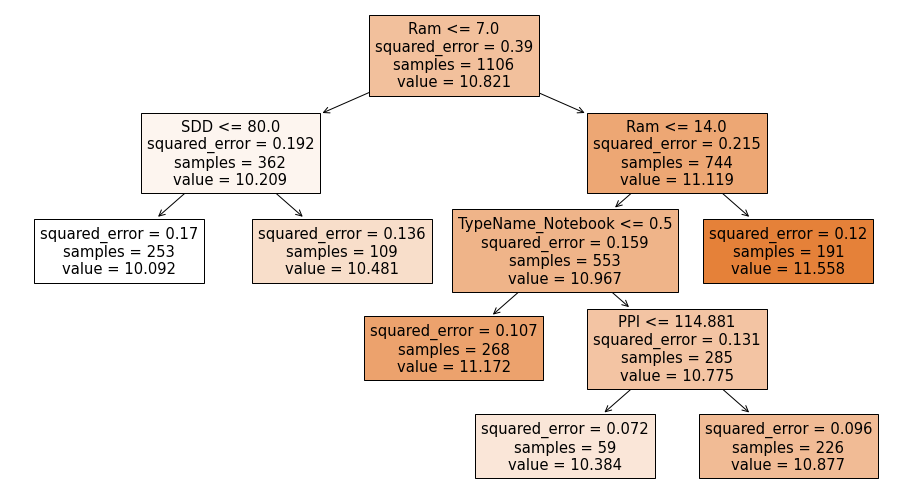

In [887]:
reg=DecisionTreeRegressor(random_state=0,ccp_alpha=0.0085)
reg.fit(X_train,y_train)
plt.figure(figsize=(16,9))
tree.plot_tree(reg,filled=True,feature_names=train.columns)

In [888]:
params={
    'RandomForest':{
        'model': RandomForestRegressor(),
        'params':{
            'n_estimators':[int(x) for x in np.linspace(100,1200,10)],
            'criterion':["absolute_error","squared_error"],
            'max_depth':[int(x) for x in np.linspace(1,30,5)],
            'max_features':['1.0','sqrt','log2'],
            'ccp_alpha':[x for x in np.linspace(0.0025,0.0125,5)],
            'min_samples_split':[2,5,10,14],
            'min_samples_leaf':[2,5,10,14],
        }
    },
    'Decision Tree':{
        'model':DecisionTreeRegressor(),
        'params':{
            'criterion':["absolute_error","squared_error"],
            'max_depth':[int(x) for x in np.linspace(1,30,5)],
            'max_features':['1.0','sqrt','log2'],
            'ccp_alpha':[x for x in np.linspace(0.0025,0.0125,5)],
            'min_samples_split':[2,5,10,14],
            'min_samples_leaf':[2,5,10,14],
        }
    }
}

In [900]:
scores = []
for modelname, mp in params.items():
    clf = RandomizedSearchCV(mp['model'],
                             param_distributions=mp['params'], cv=5,
                             n_iter=10, scoring='neg_mean_squared_error', verbose=2)

    clf.fit(X_train, y_train)
    scores.append({
        'model_name': modelname,
        'best_score': clf.best_score_,
        'best_estimator': clf.best_estimator_,
    })


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ccp_alpha=0.005, criterion=absolute_error, max_depth=1, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=955; total time=   0.2s
[CV] END ccp_alpha=0.005, criterion=absolute_error, max_depth=1, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=955; total time=   0.2s
[CV] END ccp_alpha=0.005, criterion=absolute_error, max_depth=1, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=955; total time=   0.2s
[CV] END ccp_alpha=0.005, criterion=absolute_error, max_depth=1, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=955; total time=   0.2s
[CV] END ccp_alpha=0.005, criterion=absolute_error, max_depth=1, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=955; total time=   0.2s
[CV] END ccp_alpha=0.0125, criterion=squared_error, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_

c:\Users\abhij\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\abhij\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\abhij\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py", line 476, in fit
    trees = Parallel(
  File "c:\Users\abhij\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\parallel.py"

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ccp_alpha=0.0125, criterion=squared_error, max_depth=22, max_features=sqrt, min_samples_leaf=10, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.0125, criterion=squared_error, max_depth=22, max_features=sqrt, min_samples_leaf=10, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.0125, criterion=squared_error, max_depth=22, max_features=sqrt, min_samples_leaf=10, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.0125, criterion=squared_error, max_depth=22, max_features=sqrt, min_samples_leaf=10, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.0125, criterion=squared_error, max_depth=22, max_features=sqrt, min_samples_leaf=10, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.0025, criterion=absolute_error, max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.0025, criterion=absolute_error, max

c:\Users\abhij\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\abhij\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\abhij\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py", line 1342, in fit
    super().fit(
  File "c:\Users\abhij\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py",

In [901]:
scores_df=pd.DataFrame(scores,columns=['model_name','best_score','best_estimator'])
scores_df

,model_name,best_score,best_estimator
0,RandomForest,-0.112328,"(DecisionTreeRegressor(ccp_alpha=0.005, max_de..."
1,Decision Tree,-0.130642,"DecisionTreeRegressor(ccp_alpha=0.0025, criter..."


In [902]:
scores

[{'model_name': 'RandomForest',
  'best_score': -0.11232750067514707,
  'best_estimator': RandomForestRegressor(ccp_alpha=0.005, max_depth=15, max_features='sqrt',
                        min_samples_leaf=14, min_samples_split=5,
                        n_estimators=955)},
 {'model_name': 'Decision Tree',
  'best_score': -0.13064186384774443,
  'best_estimator': DecisionTreeRegressor(ccp_alpha=0.0025, criterion='absolute_error',
                        max_depth=15, max_features='sqrt', min_samples_leaf=10,
                        min_samples_split=14)}]

In [909]:
rf=RandomForestRegressor(ccp_alpha=0.0025,max_depth=15,max_features='log2',
                      min_samples_leaf=2, min_samples_split=14,
                      n_estimators=1077)
rf.fit(X_train,y_train)
print(metrics.r2_score(y_test,y_pred))

0.8765776537326068


Prediction

train

In [910]:
predicted_train = rf.predict(train)

In [908]:
predicted_train

array([11.12759616, 10.91972053, 10.66630604, ...,  9.88856971,
       10.44923018, 10.15117342])

In [911]:
rf1=RandomForestRegressor(n_estimators=100,
                          random_state=3,
                          max_samples=0.5,
                          max_features=0.75,
                          max_depth=15)

rf1.fit(X_train,y_train)
print(f'R2 Score:{metrics.r2_score(y_test,rf1.predict(X_test))}')

R2 Score:0.8765702560894368


In [912]:
predicted=[]
testtrain= np.array(train)
for i in range(len(testtrain)):
    predicted.append(rf1.predict([testtrain[i]]))
predicted

c:\Users\abhij\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\abhij\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\abhij\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\abhij\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\abhij\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid fea

[array([11.15957052]),
 array([10.8662738]),
 array([10.57233155]),
 array([11.81305521]),
 array([11.30891209]),
 array([9.94867666]),
 array([11.44413243]),
 array([10.8662738]),
 array([11.41455391]),
 array([10.81608412]),
 array([9.79711252]),
 array([9.93349245]),
 array([11.75687103]),
 array([10.28311979]),
 array([11.19706268]),
 array([11.30891209]),
 array([10.74199004]),
 array([11.81305521]),
 array([10.3174835]),
 array([11.01768185]),
 array([9.51549453]),
 array([10.91028144]),
 array([9.73436929]),
 array([10.82403211]),
 array([10.82302474]),
 array([10.08080124]),
 array([10.89843119]),
 array([10.68389153]),
 array([11.13317693]),
 array([10.79206713]),
 array([9.82200974]),
 array([9.49211401]),
 array([10.25462373]),
 array([11.62931525]),
 array([10.89843119]),
 array([9.65966505]),
 array([9.91156986]),
 array([10.90841926]),
 array([10.15988078]),
 array([10.77774578]),
 array([10.00760294]),
 array([11.2936696]),
 array([10.32948217]),
 array([10.49104851]),
 

In [913]:
#retransform from np .log
ans=[np.exp(predicted[i][0])for i in range(len(predicted))]

In [914]:
data=df.copy()

In [915]:
data['Predicted Price']=np.array(ans)
data

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_Name,HDD,SDD,Gpu brand,Predicted Price
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,0,1,226.983005,Other intel processor,0,128,Intel,70232.786028
1,Apple,Ultrabook,8,Mac,1.34,47895.5232,0,0,127.677940,Other intel processor,0,0,Intel,52379.668809
2,HP,Notebook,8,Other,1.86,30636.0000,0,0,141.211998,Other intel processor,0,256,Intel,39039.590542
3,Apple,Ultrabook,16,Mac,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,135003.395509
4,Apple,Ultrabook,8,Mac,1.37,96095.8080,0,1,226.983005,Other intel processor,0,256,Intel,81545.146446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Windows,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,Intel,36349.122425
1299,Lenovo,2 in 1 Convertible,16,Windows,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,Intel,86646.333930
1300,Lenovo,Notebook,2,Windows,1.50,12201.1200,0,0,111.935204,Other intel processor,0,0,Intel,13364.146057
1301,HP,Notebook,6,Windows,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,AMD,36227.515656


C:\Users\abhij\AppData\Local\Temp\ipykernel_2060\3994579370.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Price'],hist=False,color='orange',label='Actual')
C:\Users\abhij\AppData\Local\Temp\ipykernel_2060\3994579370.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplo

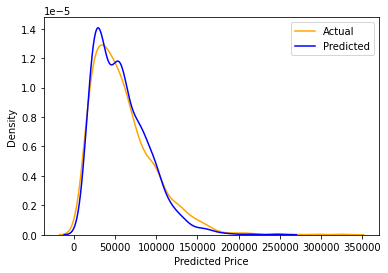

In [916]:
sns.distplot(data['Price'],hist=False,color='orange',label='Actual')
sns.distplot(data['Predicted Price'],hist=False,color='blue',label='Predicted')
plt.legend()
plt.show()


In [917]:
import pickle
file=open('laptoppricepredictor.pkl','wb')
pickle.dump(rf1,file)
file.close()

In [918]:
X_train.iloc[0]

Ram                                 8.00000
Weight                              2.00000
TouchScreen                         0.00000
IPS                                 0.00000
PPI                               100.45467
HDD                                 0.00000
SDD                               128.00000
Company_Apple                       0.00000
Company_Asus                        0.00000
Company_Chuwi                       0.00000
Company_Dell                        0.00000
Company_Fujitsu                     0.00000
Company_Google                      0.00000
Company_HP                          0.00000
Company_Huawei                      0.00000
Company_LG                          0.00000
Company_Lenovo                      0.00000
Company_MSI                         0.00000
Company_Mediacom                    0.00000
Company_Microsoft                   0.00000
Company_Razer                       0.00000
Company_Samsung                     0.00000
Company_Toshiba                 